In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model


In [25]:
df = pd.read_csv("data/output/output_complete.csv",sep=";")

In [49]:
X = df.drop("Data_Value", axis = 1) 
y = df.Data_Value
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

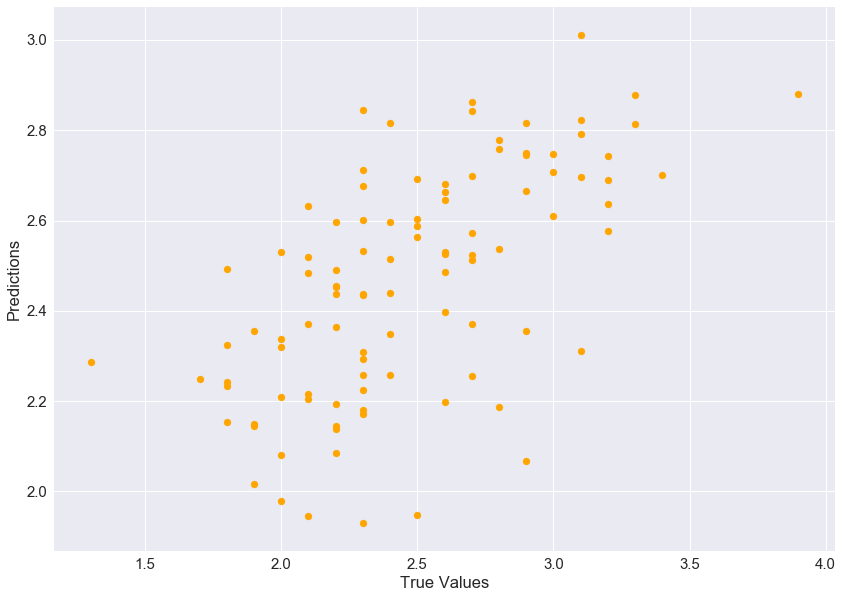

In [166]:
## The line / model
plt.figure(figsize=(14,10))
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [ ]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

In [ ]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)

In [77]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X_train,y_train)
pred = ridgeReg.predict(X_test)

#calculating mse

mse = np.mean((pred - y_test)**2)

mse #1348171.96 ## calculating score ridgeReg.score(x_cv,y_cv) 0.5691






0.1352421308026868

In [78]:
ridgeReg.score(X_test,y_test)

0.32734352537898559

In [217]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.2)

lassoReg.fit(X_train,y_train)

pred2 = lassoReg.predict(X_test)

# calculating mse

mse = np.mean((pred - y_test)**2)

print("mse;",mse)

#1346205.82

lassoReg.score(X_test,y_test)



mse; 0.1352421308026868


0.37705813085774065

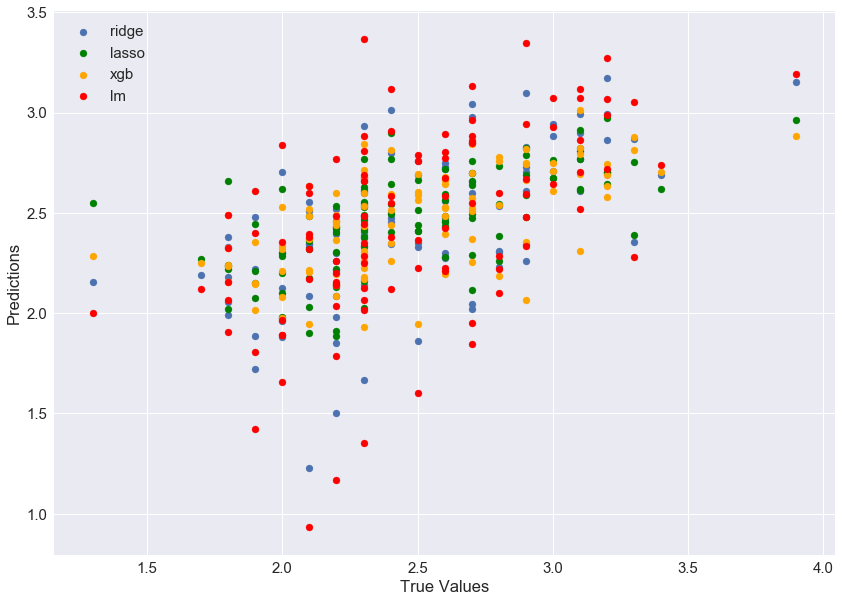

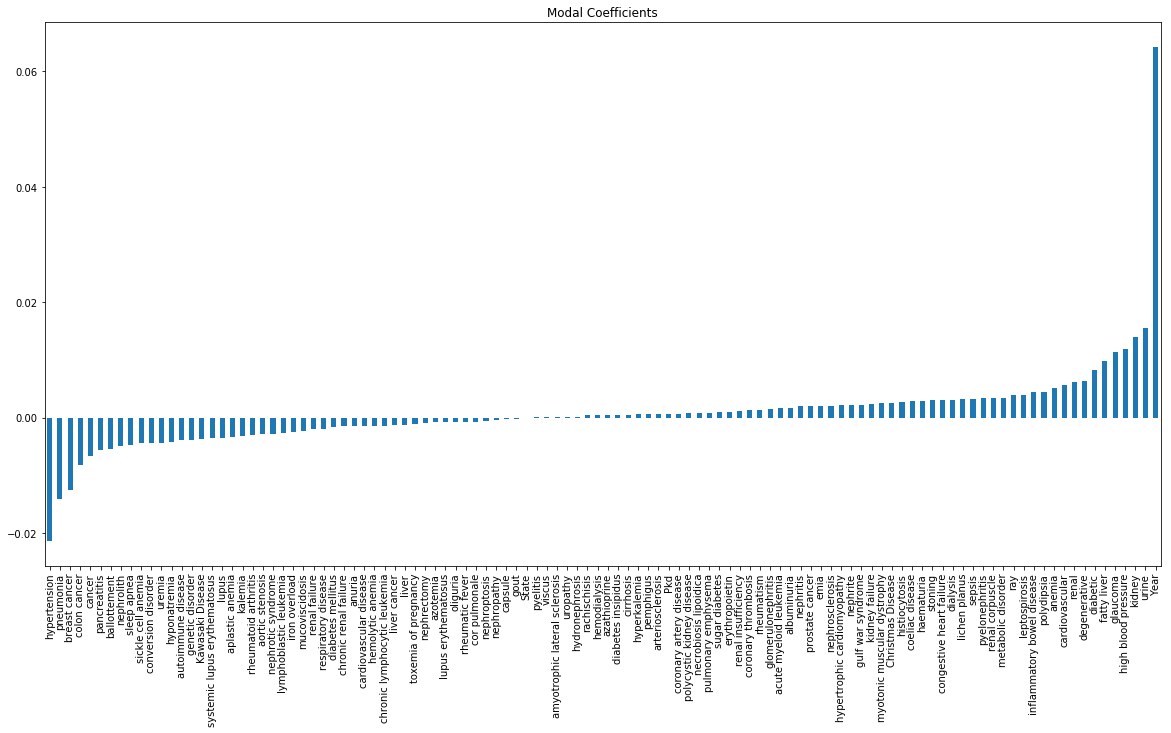

In [96]:
#checking the magnitude of coefficients
from sklearn.linear_model import LinearRegression


lreg = LinearRegression()
lreg.fit(X_train,y_train)
predictors = X_train.columns


coef = pd.Series(lreg.coef_,predictors).sort_values()
plt.figure(figsize=(20,10))


coef.plot(kind='bar', title='Modal Coefficients')
plt.show()

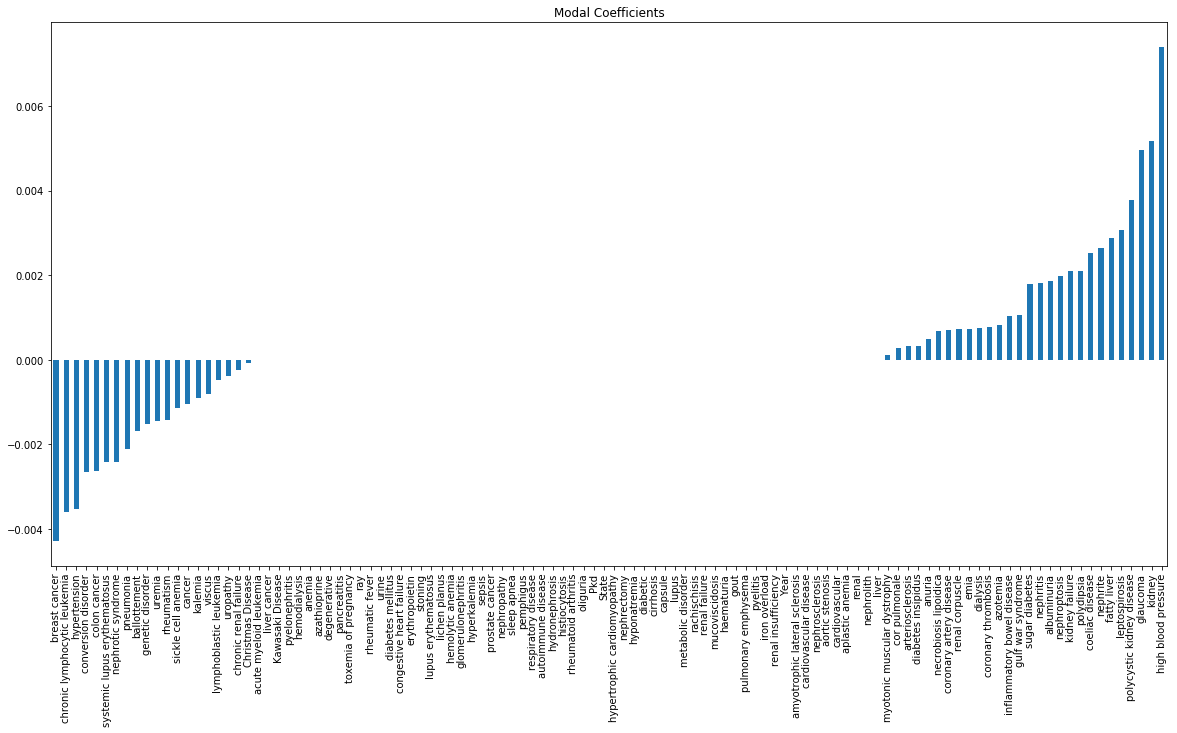

In [111]:
#checking the magnitude of coefficients lass
from sklearn.linear_model import LinearRegression

predictors = X_train.columns



coef = pd.Series(lassoReg.coef_,predictors).sort_values()
plt.figure(figsize=(20,10))


coef.plot(kind='bar', title='Modal Coefficients')
plt.show()

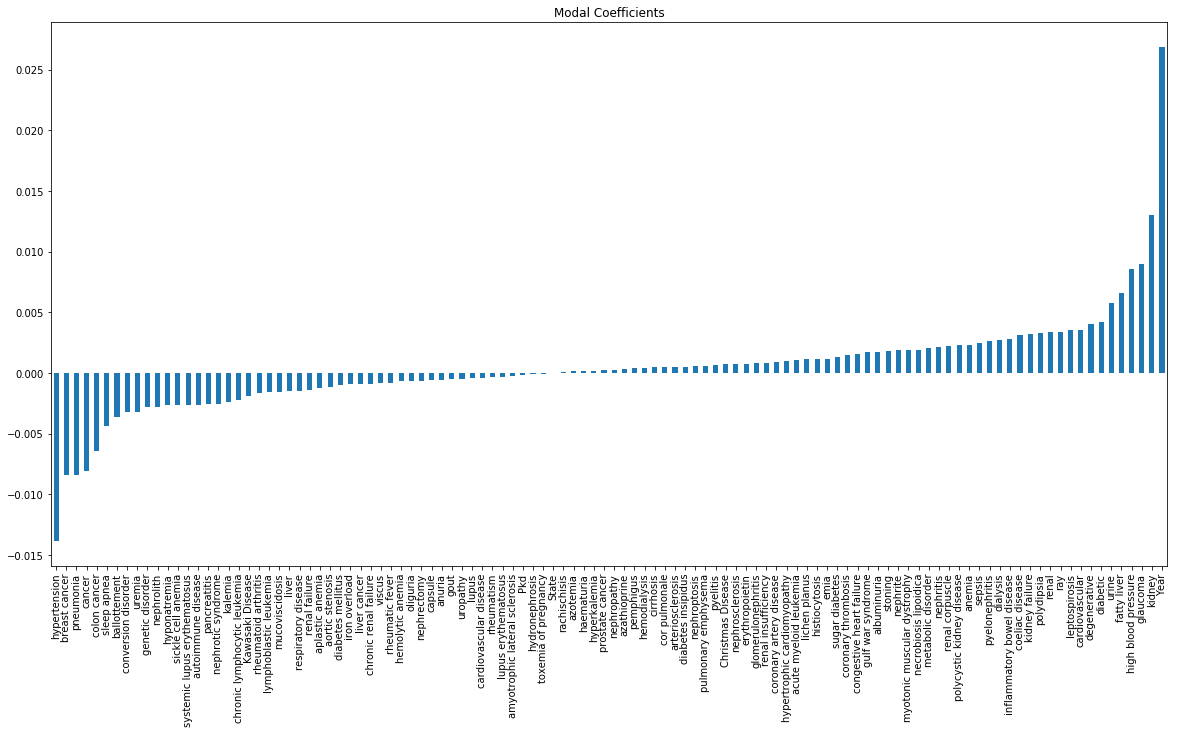

In [110]:
#checking the magnitude of coefficients ridge
from sklearn.linear_model import LinearRegression

predictors = X_train.columns



coef = pd.Series(ridgeReg.coef_,predictors).sort_values()
plt.figure(figsize=(20,10))


coef.plot(kind='bar', title='Modal Coefficients')
plt.show()

In [114]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

/Users/giacomomaretto/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [129]:
cv_params = {'max_depth': [3,5,7,10], 'min_child_weight': [1,3,5,7,10]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'reg:linear'}
optimized_GBM = GridSearchCV(xgb.XGBRegressor(**ind_params), 
                            cv_params, 
                             scoring = 'r2', cv = 5, n_jobs = -1) 
# Optimize for accuracy since that is the metric used in the Adult Data Set notation

In [130]:
optimized_GBM.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7, 10], 'min_child_weight': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [134]:
optimized_GBM.grid_scores_


[mean: 0.17956, std: 0.07995, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.22779, std: 0.12345, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.22120, std: 0.11320, params: {'max_depth': 3, 'min_child_weight': 5},
 mean: 0.24496, std: 0.09668, params: {'max_depth': 3, 'min_child_weight': 7},
 mean: 0.22420, std: 0.09110, params: {'max_depth': 3, 'min_child_weight': 10},
 mean: 0.18339, std: 0.05386, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: 0.15541, std: 0.08435, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: 0.23528, std: 0.09831, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: 0.23573, std: 0.10079, params: {'max_depth': 5, 'min_child_weight': 7},
 mean: 0.20773, std: 0.09967, params: {'max_depth': 5, 'min_child_weight': 10},
 mean: 0.17658, std: 0.02520, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: 0.15712, std: 0.07396, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: 0.20664, std: 0.10531, params: {'max_depth'

In [135]:
cv_params = {'learning_rate': [0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
ind_params = {'n_estimators': 1000, 'seed':0, 'colsample_bytree': 0.8, 
             'objective': 'reg:linear', 'max_depth': 3, 'min_child_weight': 7}


optimized_GBM = GridSearchCV(xgb.XGBRegressor(**ind_params), 
                            cv_params, 
                             scoring = 'r2', cv = 5, n_jobs = -1)
optimized_GBM.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=7, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.01], 'subsample': [0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [136]:
optimized_GBM.grid_scores_

[mean: 0.21067, std: 0.05967, params: {'learning_rate': 0.1, 'subsample': 0.7},
 mean: 0.24496, std: 0.09668, params: {'learning_rate': 0.1, 'subsample': 0.8},
 mean: 0.20490, std: 0.09919, params: {'learning_rate': 0.1, 'subsample': 0.9},
 mean: 0.25085, std: 0.09452, params: {'learning_rate': 0.01, 'subsample': 0.7},
 mean: 0.22899, std: 0.10125, params: {'learning_rate': 0.01, 'subsample': 0.8},
 mean: 0.21825, std: 0.09822, params: {'learning_rate': 0.01, 'subsample': 0.9}]

In [144]:
xgdmat = xgb.DMatrix(X_train, y_train) # Create our DMatrix to make XGBoost more efficient


In [145]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'reg:linear', 'max_depth': 3, 'min_child_weight': 7}

# Grid Search CV optimized settings

cv_xgb = xgb.cv(params = our_params, dtrain = xgdmat, num_boost_round = 3000, nfold = 5,
                metrics = ['rmse'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100) # Look for early stopping that minimizes error

In [147]:
cv_xgb.tail(5)

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
88,0.410747,0.024409,0.078298,0.004701
89,0.410677,0.024111,0.077333,0.004627
90,0.410417,0.024172,0.076049,0.004737
91,0.410612,0.023961,0.074584,0.004779
92,0.410179,0.024087,0.073543,0.004695


In [148]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'reg:linear', 'max_depth':3, 'min_child_weight':7} 

final_gb = xgb.train(our_params, xgdmat, num_boost_round = 92)

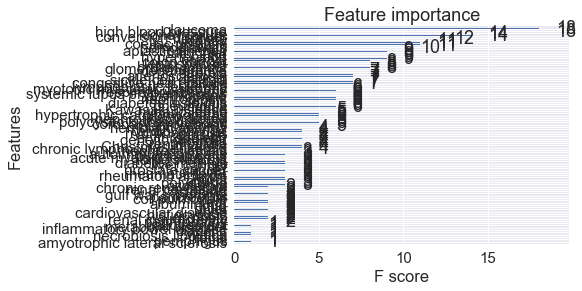

In [157]:
#plt.figure(figsize=(14,10))
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.5)
xgb.plot_importance(final_gb)
plt.show()

In [158]:
importances = final_gb.get_fscore()
importances

{'Christmas Disease': 4,
 'Kawasaki Disease': 5,
 'Pkd': 9,
 'Year': 2,
 'acute myeloid leukemia': 3,
 'albuminuria': 2,
 'amyotrophic lateral sclerosis': 1,
 'anemia': 7,
 'anuria': 3,
 'aortic stenosis': 3,
 'aplastic anemia': 9,
 'arteriosclerosis': 7,
 'autoimmune disease': 3,
 'azathioprine': 6,
 'azotemia': 3,
 'ballottement': 1,
 'breast cancer': 8,
 'cancer': 7,
 'capsule': 4,
 'cardiovascular': 4,
 'cardiovascular disease': 2,
 'chronic lymphocytic leukemia': 4,
 'chronic renal failure': 2,
 'cirrhosis': 2,
 'coeliac disease': 11,
 'colon cancer': 8,
 'congestive heart failure': 7,
 'conversion disorder': 14,
 'cor pulmonale': 2,
 'coronary thrombosis': 5,
 'degenerative': 7,
 'diabetes insipidus': 6,
 'diabetes mellitus': 3,
 'diabetic': 1,
 'dialysis': 7,
 'emia': 2,
 'erythropoietin': 4,
 'fatty liver': 9,
 'genetic disorder': 4,
 'glaucoma': 18,
 'glomerulonephritis': 8,
 'gout': 3,
 'gulf war syndrome': 2,
 'hemodialysis': 10,
 'hemolytic anemia': 4,
 'high blood pressure

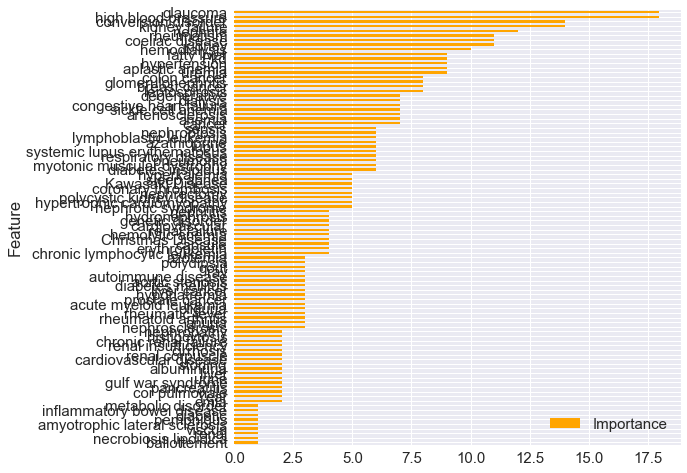

In [159]:
importance_frame = pd.DataFrame({'Importance': list(importances.values()), 'Feature': list(importances.keys())})
importance_frame.sort_values(by = 'Importance', inplace = True)
importance_frame.plot(kind = 'barh', x = 'Feature', figsize = (8,8), color = 'orange')

In [210]:
testdmat = xgb.DMatrix(X_test)

(205, 110)

In [162]:
from sklearn.metrics import accuracy_score
y_pred = final_gb.predict(testdmat) # Predict using our testdmat
y_pred

array([ 2.3248291 ,  2.14406109,  2.82309198,  2.25490093,  2.69011188,
        2.7077229 ,  2.69180632,  2.44026184,  2.56408429,  2.48323965,
        2.49064636,  2.06743455,  2.31942749,  2.69767737,  1.97805512,
        2.14532685,  2.24162912,  2.81669903,  2.74670744,  1.92938375,
        2.69527626,  2.87709188,  2.57282829,  2.20457268,  2.1543088 ,
        2.43801355,  2.53746438,  2.31093025,  2.59634209,  2.8450377 ,
        2.13887024,  2.59735894,  2.63633871,  2.53114939,  2.51450801,
        2.19762802,  2.39719796,  2.29258728,  2.67750621,  2.21558595,
        1.94461644,  2.37125492,  2.37088823,  2.53227639,  2.25855875,
        2.58704829,  2.30800247,  2.25819159,  2.66216898,  2.68131542,
        2.45531821,  3.01139903,  2.20835423,  2.70139933,  2.1706183 ,
        2.19346833,  2.77922273,  2.60931492,  2.79224396,  2.74414754,
        2.08434415,  2.22532606,  2.84164023,  2.64588308,  2.5233984 ,
        2.4375329 ,  2.53020668,  2.71181011,  2.23420954,  2.08

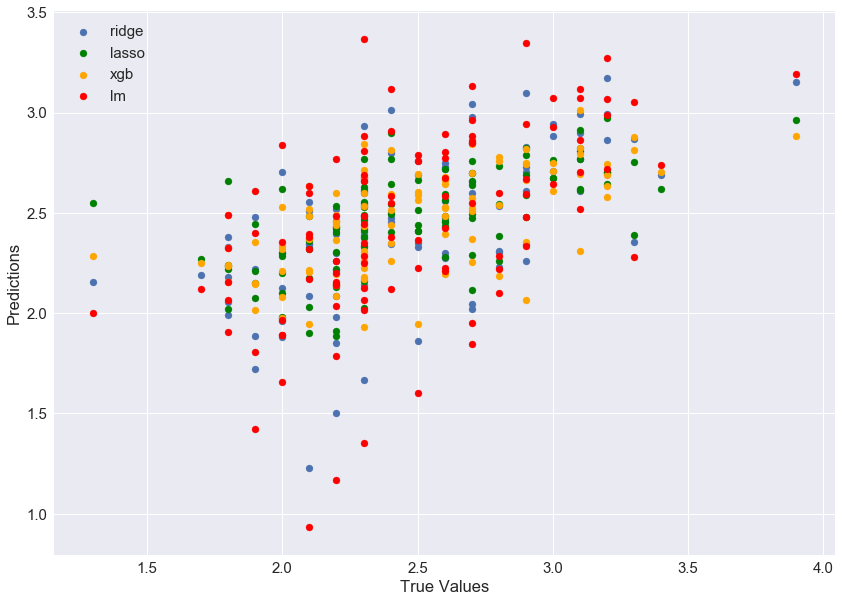

In [167]:
## The line / model
plt.figure(figsize=(14,10))
plt.scatter(y_test, pred)
plt.scatter(y_test, pred2,color="green")
plt.scatter(y_test,y_pred,color="orange")

plt.scatter(y_test, predictions,color="red")



plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend(["ridge","lasso","xgb","lm"])
plt.show()

In [179]:
>>> from sklearn import preprocessing
d = X_train.iloc[:,2:]

In [180]:
X_scaled = preprocessing.scale(d)

In [209]:
pd.DataFrame(X_scaled).shape

(205, 108)

In [195]:
>>> from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

In [197]:
pd.DataFrame(sel.fit_transform(X_train)).shape

(205, 109)

In [212]:
(d.astype(bool).sum(axis=0)>100).index # number of npn zerop elelment @ list of variables with at least 100 non zero values

Index(['nephroptosis', 'necrobiosis lipoidica', 'renal insufficiency',
       'high blood pressure', 'iron overload', 'pyelitis',
       'pulmonary emphysema', 'gout', 'leptospirosis', 'kalemia',
       ...
       'hyperkalemia', 'sepsis', 'pemphigus', 'erythropoietin',
       'diabetes mellitus', 'Kawasaki Disease', 'chronic renal failure',
       'rheumatic fever', 'ballottement', 'rheumatism'],
      dtype='object', length=108)